### Student Details

Student name: Pierre-Louis JALLERAT

Student ID: 21181659

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the `Hitters` dataset.

In [1]:
import pandas as pd
df = pd.read_csv('Hitters_train.csv', header=0)
df.head(8)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,Kent Hrbek,550,147,29,85,91,71,6,2816,815,117,405,474,319,1218,104,10,1310.0
1,Steve Buechele,461,112,18,54,54,35,2,680,160,24,76,75,49,111,226,11,135.0
2,Terry Kennedy,19,4,1,2,3,1,1,19,4,1,2,3,1,692,70,8,920.0
3,Jim Presley,616,163,27,83,107,32,3,1437,377,65,181,227,82,110,308,15,200.0
4,Ken Landreaux,283,74,4,34,29,22,10,3919,1062,85,505,456,283,145,5,7,737.5
5,Mike Diaz,209,56,12,22,36,19,2,216,58,12,24,37,19,201,6,3,90.0
6,Willie Upshaw,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0
7,Phil Garner,313,83,9,43,41,30,14,5885,1543,104,751,714,535,58,141,23,450.0


Look at all the features (columns) with a C at the front of the name. These are all *career* statistics - that is the total number of hits, home runs, etc., over the course of the player's career. Let's plot some of them against years. Because they are career statistics, they are quite likely to be correlated with the number of years played. Let's plot a few of them against the years played.

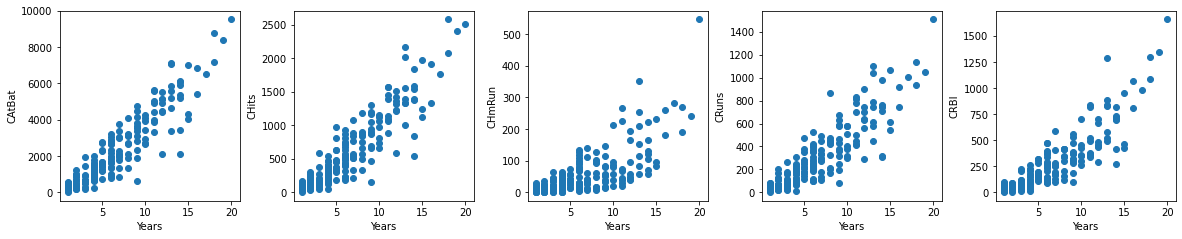

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(20, 3.5))
fig.subplots_adjust(wspace=0.3)

for i in range(0,5):
    ax[i].scatter(df.iloc[:, 7], df.iloc[:, 8+i]);
    ax[i].set(xlabel=df.columns[7], ylabel=df.columns[8+i])

plt.show()

Yes, we can see that there is some correlation between the years played and these career statistics. We can probably assume that the causal relationship is simply this: if you have been playing for a long time, you are more likely to accumulate higher career statistics.

So there is certainly some redundancy here.

There may be additional correlattions, that are maybe not as obvious. Let's plot some of the statistics against the `CHits` statistic.

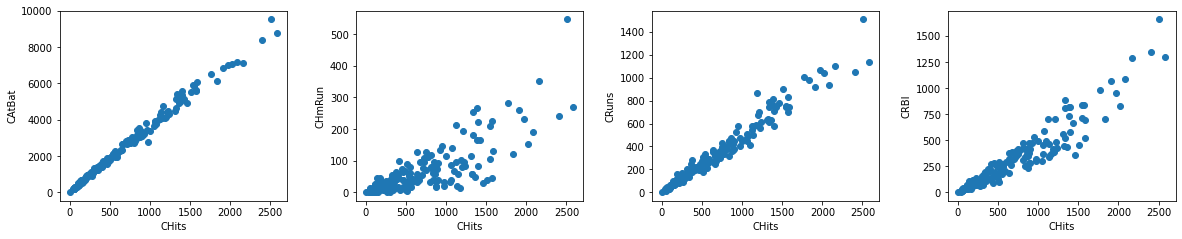

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20, 3.5))
fig.subplots_adjust(wspace=0.3)

cols = [8,10,11,12]
for i in range(0,4):
    ax[i].scatter(df.iloc[:, 9], df.iloc[:, cols[i]]);
    ax[i].set(xlabel=df.columns[9], ylabel=df.columns[cols[i]])

plt.show()

Well, it would seem that we have at least a couple of very correlated statistics. The correlation between `CAtBat` (the number of times a player steps up to bat) versus `CHits` makes sense. The more times a player tries to hit, the more times a player will hit. The more times a player hits, the more Runs a player will get.

But we might also think that there is a causal relationship, and thus a strong correlation, between the number of hits in a players career `CHits`, and the the number of home runs `CHmRun`. And, there is. A player that has rarely hit will not get many home runs. But the correlation is not so strong. There are some players with many hits, but few home runs, for example.

What has been discussed is not very precise, as I'm trying to give an intuitive feel for the correlations between features. We could of course measure the correlation between features. The equation for correlation was given in the first task Jupyter Notebook, except it measured correlation of a feature $\textbf{X}^{(i)}$ against the outcomes $\textbf{y}$, salary in this case. It's easy here to replace $\textbf{y}$ with one of the other features $\textbf{X}^{(h)}$.

In fact, this is more or less what PCA does. One of the steps of PCA is to compute the *covariance matrix*. This matrix contains the covariance between two variables (variables in this case being the features of our dataset). And [covariance and correlation are very similar](https://en.wikipedia.org/wiki/Covariance_and_correlation).

Let's have a look at one more example. Consider that we had a dataset only of `CHits`, `CRuns` and `CAtBat`. As discussed, it seems intuitive that the three are related. The more times you are at bat, the more hits you will make, and the more runs you will get. Let's plot this in 3D.

In [4]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(13, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(df.iloc[:, 8], df.iloc[:, 9], df.iloc[:, 11])
ax1.set(xlabel=df.columns[8], ylabel=df.columns[9], zlabel=df.columns[11])

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(df.iloc[:, 7], df.iloc[:, 9], df.iloc[:, 11])
ax2.set(xlabel=df.columns[7], ylabel=df.columns[9], zlabel=df.columns[11])

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see that our intuition in this case is pretty good. There seems to be a highly linear relationship between the three features, `CHits`, `CRuns` and `CAtBat`. We should expect a PCA in this case to pick a 1D subspace that would describe this 3D feature space nicely.

In contrast, the second figure on the right, in which `CAtBat` is replaced with `Years` is not as clean. It would certainly appear that there is a relationship, but probably a 2D subspace in this case would be more appropriate.

A PCA will find these relationships, and those with higher dimensions than we can visualise here. It's what it is designed to do.

A final note: At no point do we look at the target variable $\mathbf{y}$ when doing PCA. This makes it an applicable filter for data for both *supervised* and *unsupervised* machine learning algorithms, as well as being an *unsupervised* machine learning algorithm itself.

# Task

On to this weeks task. We will perform PCA on the Hitters data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a [Support Vector Regression](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default

Discuss the following points, and compare with the previous task in this activity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the [root-mean-squared-error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
3. How about if we set the variance to 99%? And how about 99.9%?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

In [5]:
# (given)
%matplotlib inline

import pandas as pd

df_train = pd.read_csv('Hitters_train.csv', header=0)
df_test = pd.read_csv('Hitters_test.csv', header=0)

X_train = df_train.iloc[:, 1:17].values
y_train = df_train.iloc[:, 17].values
X_test = df_test.iloc[:, 1:17].values
y_test = df_test.iloc[:, 17].values

In [6]:
# (given)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler().fit(X_train)
sc_y = StandardScaler().fit(y_train.reshape(-1, 1))
X_train_std = sc_X.transform(X_train)
X_test_std = sc_X.transform(X_test)
y_train_std = sc_y.transform(y_train.reshape(-1, 1))

In [7]:
from sklearn.decomposition import PCA

# Set the PCA model so it reduce the number of features as much as possible and does not decrease the variance more than 5%  
pca = PCA(n_components = 0.95)

# Apply the reduction on the train scale dataset
X_train_std_reduced = pca.fit_transform(X_train_std)

# Comparing the old number of features versus the new one
new_nb_components = X_train_std_reduced.shape[1]
old_nb_components = X_train_std.shape[1]
print("Number of components changes from", old_nb_components, "to", new_nb_components)

Number of components changes from 16 to 7


In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Fit a SVR model with the train scaled data
svr = SVR(kernel = 'linear')
svr.fit(X_train_std_reduced, y_train_std.T[0])

# Apply the same reduction used for train datset, on the test dataset
X_test_std_reduced = pca.transform(X_test_std)

# Make the predictions
prediction =  svr.predict(X_test_std_reduced)

# Our prediction are made from scaled data, so we need to "inverse the scaling" to find consistent data with the reality (salary's players)
prediction_inverse = sc_y.inverse_transform(prediction)

# Calculate the mean error between our prediction and the truth (represents by the y_test dataset)
mean_error = mean_squared_error(y_test, prediction_inverse, squared=False)
print("Mean error:", mean_error)

Mean error: 450.1811170847561


Let's try with a variance of 99%

In [9]:
# We apply the same method with a threshold variance of 99% 

# Set the PCA model so it reduce the number of features as much as possible and does not decrease the variance more than 1%  
pca99 = PCA(n_components = 0.99)

# Apply the reduction on the train scale dataset
X_train_std_reduced99 = pca99.fit_transform(X_train_std)

new_nb_components = X_train_std_reduced99.shape[1]
old_nb_components = X_train_std.shape[1]
print("Number of components changes from", old_nb_components, "to", new_nb_components)

# Fit a SVR model with the train scaled data
svr99 = SVR(kernel = 'linear')
svr99.fit(X_train_std_reduced99, y_train_std.T[0])

# Apply the same reduction used for train datset, on the test dataset
X_test_std_reduced99 = pca99.transform(X_test_std)

# Make prediction
prediction99 =  svr99.predict(X_test_std_reduced99)

# Inverse the scaling to find consistent data with the reality (salary's players)
prediction_inverse99 = sc_y.inverse_transform(prediction99)

# Calculate the mean error between our prediction and the truth 
mean_error99 = mean_squared_error(y_test, prediction_inverse99, squared=False)
print("Mean error:", mean_error99)

Number of components changes from 16 to 11
Mean error: 452.03714345626827


Let's try with a variance of 99.9%

In [10]:
# We apply the same method with a threshold variance of 99.9% 
pca999 = PCA(n_components = 0.999)

# Set the PCA model so it reduce the number of features as much as possible and does not decrease the variance more than 0.1%  pca999 = PCA(n_components = 0.999)
X_train_std_reduced999 = pca999.fit_transform(X_train_std)

new_nb_components = X_train_std_reduced999.shape[1]
old_nb_components = X_train_std.shape[1]
print("Number of components changes from", old_nb_components, "to", new_nb_components)

# Fit a SVR model with the train scaled data
svr999 = SVR(kernel = 'linear')
svr999.fit(X_train_std_reduced999, y_train_std.T[0])

# Apply the same reduction used for train datset, on the test dataset
X_test_std_reduced999 = pca999.transform(X_test_std)

# Make prediction
prediction999 =  svr999.predict(X_test_std_reduced999)

# Inverse the scaling to find consistent data with the reality (salary's players)
prediction_inverse999 = sc_y.inverse_transform(prediction999)

# Calculate the mean error between our prediction and the truth
mean_error999 = mean_squared_error(y_test, prediction_inverse999, squared=False)
print("Mean error:", mean_error999)

Number of components changes from 16 to 14
Mean error: 432.08610744242316


Then

1. In a loop, set the number of components to keep from 1 to the total number of features
2. In each iteration, train an SVM regression (linear and default parameters)
3. In each iteration, calculate and record the RMSE
4. Plot the RMSE values per number of features

Discuss:

1. How does this compare to the the graphs of RMSE values from Task 1?

In [11]:
from sklearn.decomposition import PCA

# Get the number of features
lenght = X_train.shape[1]

# Array to store the mean error per number of components
mean_error_per_nb_of_component = []

for k in range(1, lenght + 1):
  # Reduce our train dataset in k components
  pca_k = PCA(n_components = k)
  X_train_std_reduced_k = pca_k.fit_transform(X_train_std)

  # Get the number of component in the new dataset
  new_nb_components = X_train_std_reduced_k.shape[1]
  
  # Fit a SVR model with the train scaled data
  svr_k = SVR(kernel = 'linear')
  svr_k.fit(X_train_std_reduced_k, y_train_std.T[0])

  # Apply the same reduction used for train datset, on the test dataset
  X_test_std_reduced_k = pca_k.transform(X_test_std)
  prediction_k =  svr_k.predict(X_test_std_reduced_k)

  # Inverse the scaling to find consistent data with the reality (salary's players)
  prediction_inverse_k = sc_y.inverse_transform(prediction_k)

  # Calculate the mean error between our prediction and the truth
  mean_error_k = mean_squared_error(y_test, prediction_inverse_k, squared=False)
  print("Number of component kept:", k, " -  Mean error:", mean_error_k)
  # Store in the mean error in an array
  mean_error_per_nb_of_component.append(mean_error_k)

Number of component kept: 1  -  Mean error: 462.05343455595096
Number of component kept: 2  -  Mean error: 456.48905064128405
Number of component kept: 3  -  Mean error: 457.47797820527387
Number of component kept: 4  -  Mean error: 448.91281016827446
Number of component kept: 5  -  Mean error: 455.492730859505
Number of component kept: 6  -  Mean error: 451.2141869912471
Number of component kept: 7  -  Mean error: 450.1811170847561
Number of component kept: 8  -  Mean error: 452.2249327373278
Number of component kept: 9  -  Mean error: 452.21976018753827
Number of component kept: 10  -  Mean error: 453.66145330259326
Number of component kept: 11  -  Mean error: 452.03714345626827
Number of component kept: 12  -  Mean error: 450.63177705146455
Number of component kept: 13  -  Mean error: 437.67472208905536
Number of component kept: 14  -  Mean error: 432.08610744242316
Number of component kept: 15  -  Mean error: 431.9384427797746
Number of component kept: 16  -  Mean error: 437.141155

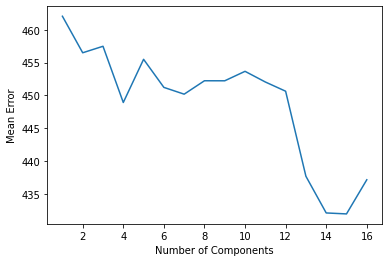

In [12]:
import matplotlib.pyplot as plt

# Plot the mean error versus the number of components
plt.plot(range(1, lenght + 1), mean_error_per_nb_of_component)
plt.xlabel("Number of Components")
plt.ylabel("Mean Error")
plt.show()

1. How does this compare to the the graphs of RMSE values from Task 1?

The PCA is very efficient, comparing to Task 1, we obtain good mean error with only few components. For example the best mean error found with Univariate Feature Selection is 447 with the 16 features whereas with PCA we have almost the same mean error (449) with only 4 components.
PCA is efficient from one component, we need a big number of component (13 in the plot above) to be able to see the Mean Error significantly decrease. Whereas Unvariate Feature Selection need less features (around 8) the start performing really better.